# Homework 3

# Problem 1

## 1a

For a proportionality constant $k$ we can write:

$\pi(x) = k \cdot x^{\alpha-1}(1-x)^{\beta-1}$

$ \log \pi(x) = \log k + (\alpha-1)\log x + (\beta-1) \log (1-x)$

To use adaptive rejection sampling, we need the first derivative of $\log \pi(x)$ to exist and the second derivative to be non positive.

$\log \pi'(x) = \frac{\alpha-1}{x}-\frac{\beta-1}{1-x}$

$\log \pi''(x) = -\frac{\alpha-1}{x^2}-\frac{\beta-1}{(1-x)^2}$

As we can see, $\log \pi'(x)$ exists for $0<x<1$. Let's see which values of $\alpha$ and $\beta$ make $\log \pi''(x)$ non positive.

$\log \pi''(x) \le 0 \quad$ for all $0<x<1$

$ -\log \pi''(x) = \frac{\alpha-1}{x^2} + \frac{\beta-1}{(1-x)^2} \ge 0 \quad$ for all $0<x<1$

Let's study two border cases first.

$\displaystyle \lim_{x \to 0} - \log \pi''(x) = \lim_{x \to 0} \frac{\alpha-1}{x^2} + \frac{\beta-1}{(1-x)^2} = \lim_{x \to 0} \frac{\alpha-1}{x^2} + \frac{\beta-1}{1^2} = \lim_{x \to 0} \frac{\alpha-1}{x^2} \ge 0$

Resulting in $\alpha \ge 1$.

$\displaystyle \lim_{x \to 1} - \log \pi''(x) = \lim_{x \to 1} \frac{\alpha-1}{x^2} + \frac{\beta-1}{(1-x)^2} = \lim_{x \to 1} \frac{\alpha-1}{1^2} + \frac{\beta-1}{(1-x)^2} = \lim_{x \to 1} \frac{\beta-1}{(1-x)^2} \ge 0$

Resulting in $\beta \ge 1$.

From these border cases we see, that $\alpha \ge 1$ and $\beta \ge 1$. It is also easy to see, that these
constraints on $\alpha$ and $\beta$ make term $-\log \pi''(x) = \frac{\alpha-1}{x^2} + \frac{\beta-1}{(1-x)^2}$ non-negative for all
values of $0<x<1$.

Therefore, $\log \pi''(x)$ is non positive for $\alpha \ge 1$ and $\beta \ge 1$.

Answer: adaptive rejection sampling can be used for $\alpha \ge 1$ and $\beta \ge 1$.

## 1b

In [1]:
library(ars)
set.seed(42)

In [2]:
# log pi(x)
f <- function(x, a, b){
    return((a-1) * log(x) + (b-1) * log(1-x))
}

# log pi'(x)
fprima <- function(x, a, b){
    return((a-1) / (x) - (b-1) / (1-x))
}

In [3]:
R = 10^5
a = 2
b = 6

gen_beta <-ars(R,f,fprima, x=c(0.3,0.6), 
               m=2, lb=TRUE, xlb=0, ub=TRUE, xub=1, 
               a=a ,b=b)

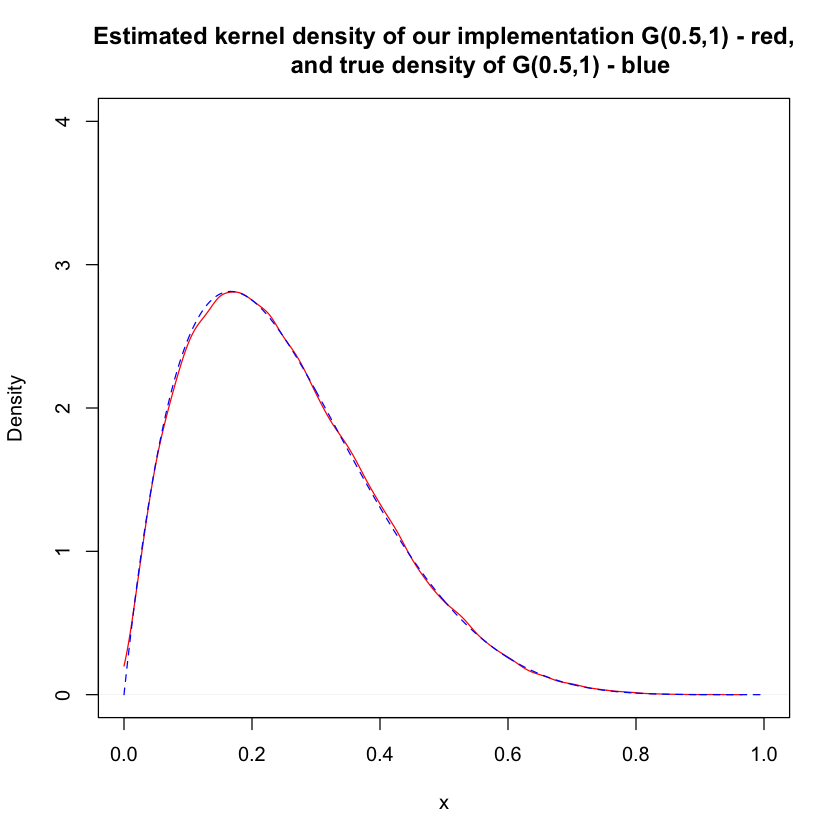

In [4]:
x <- seq(0, 1, length=1000)

plot(density(gen_beta, from=0), xlim=c(0,1), ylim=c(0,4), col='red', xlab="x",
     main="Estimated kernel density of our implementation G(0.5,1) - red,
           and true density of G(0.5,1) - blue")
lines(x, dbeta(x, a, b),col='blue', lty=2)

# Problem 2

Let $I$ denote if individual has HIV and $T$ denoting if the test is positive. Then:

\begin{equation}
\begin{array}{l}
P(T=1 | I=1)=0.99 \\
P(T=0 | I=0)=0.98 \\
P(I=1)=0.001  \\
\end{array}
\end{equation}

## 2.a

$P(I=1 | T=1)-?$

\begin{equation}
\begin{array}{l}
P(I=1 | T=1) \overset{\text{Bayes Theorem}}{=} \frac{P(T=1 | I=1) \cdot P(I=1)}{P(T=1)} \\
P(I=0)=1- P(I=1) = 0.999 \\
P(T=1)=P(T=1 | I=1) \cdot P(I=1)+P(T=1 | I=0) \cdot P(I=0) =\\
\quad =0.99 \cdot 0.001+0.02 \cdot 0.999 = 0.02097 \\
P(I=1 | T=1)=\frac{0.99 \cdot 0.001}{0.02907} \approx 0.04721 = 4.721 \%
\end{array}
\end{equation}

## 2.b

$percentage(I=0 | T=1) - ?$

\begin{equation}
percentage(I=0 | T=1) = P(I=0 | T=1)=1-P(I=1 | T=1) \approx \\
\approx 0.95279 = 95.279 \%
\end{equation}

# Problem 3

## 3.a

For i.i.d. data we can write likelihood as follows:

\begin{equation}
\begin{aligned}
\ell(\lambda)=f(\textbf{y} | \lambda) & \stackrel{i.i.d.}{=} \prod_{i=1}^{n} f\left(y_{i} | \lambda\right) \\
&=\prod_{i=1}^{n} \frac{\lambda^{y_{i}} e^{-\lambda}}{y_{i}!} \\
& \propto \prod_{i=1}^{n} \lambda^{y_{i}} e^{-\lambda} \\
&=e^{-\lambda n} \cdot \lambda^{\sum_{i=1}^{n} y_{i}}
\end{aligned}
\end{equation}

Then the maximum likelihood estimate is:

\begin{equation}
\begin{aligned}
\hat{\lambda}_{MLE} &=\operatorname{arg} \max _{\lambda} \ell(\lambda)=\operatorname{arg} \max _{\lambda} \log \ell(\lambda)\\
&=\operatorname{\arg} \max_{\lambda}\left[-n \cdot \lambda+\log \lambda \cdot \sum_{i=1}^{n} y_{i}\right]
\end{aligned}
\end{equation}

\begin{equation}
\begin{array}{l}
\frac{d}{d \lambda} \log \ell(\lambda)=-n+\frac{1}{\lambda} \sum_{i=1}^{n} y_{i} \stackrel{!}{=} 0 \\
\lambda= \frac{\sum_{i=1}^{n} y_{i}}{n} \\
\hat{\lambda}_{MLE}=\frac{\sum_{i=1}^{n} y_{i}}{n}
\end{array}
\end{equation}

## 3.b

\begin{equation}
\begin{aligned}
p(\lambda) =G(\alpha, \beta) &=\frac{\beta^{\alpha} \cdot \lambda^{\alpha-1} \cdot e^{-\beta \lambda}}{\Gamma(\alpha)} \\
&\propto \lambda^{\alpha-1} e^{-\beta\lambda}
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
p(\lambda | \textbf{y}) &=\frac{\ell(\lambda) \cdot p(\lambda)}{f(\textbf{y})}=\\
& \propto \ell(\lambda) \cdot p(\lambda) \\
& \propto \lambda^{\alpha-1} \cdot e^{-\beta \lambda} \cdot e^{-n \lambda} \cdot \lambda^{\sum_{i=1}^{n}y_{i}}\\
& = \lambda^{\left(\alpha-1+\sum_{i=1}^{n} y_{i}\right)} \cdot e^{-\lambda(\beta+n)} \\
& \propto G(\alpha+\sum_{i=1}^{n} y_{i}, \beta+n)
\end{aligned}
\end{equation}

As we can see, posterior is Gamma-distributed with
$\alpha_{post} =\alpha+\sum_{i=1}^{n} y_{i}$ and $\beta_{post} =\beta+n$.

## 3.c

In [5]:
lambda <- 5

n <- 10^3

a_prior <- 70
b_prior <- 10

n_1 <- 10
n_2 <- 100
n_3 <- 1000

In [6]:
set.seed(42)
samples <- rpois(n, lambda)

In [7]:
ab_posterior <- function(a_prior, b_prior, y){
    a_post = a_prior + sum(y)
    b_post = b_prior + length(y)
    c(a_post, b_post)
}

mle_lambda <- function(y){
    return(mean(y))
}

In [8]:
res_1 <- ab_posterior(a_prior, b_prior, samples[1:n_1])
res_2 <- ab_posterior(a_prior, b_prior, samples[1:n_2])
res_3 <- ab_posterior(a_prior, b_prior, samples[1:n_3])
a_post_1 <- res_1[1]
b_post_1 <- res_1[2]
a_post_2 <- res_2[1]
b_post_2 <- res_2[2]
a_post_3 <- res_3[1]
b_post_3 <- res_3[2]
mle_1 <- mle_lambda(samples[1:n_1])
mle_2 <- mle_lambda(samples[1:n_2])
mle_3 <- mle_lambda(samples[1:n_3])

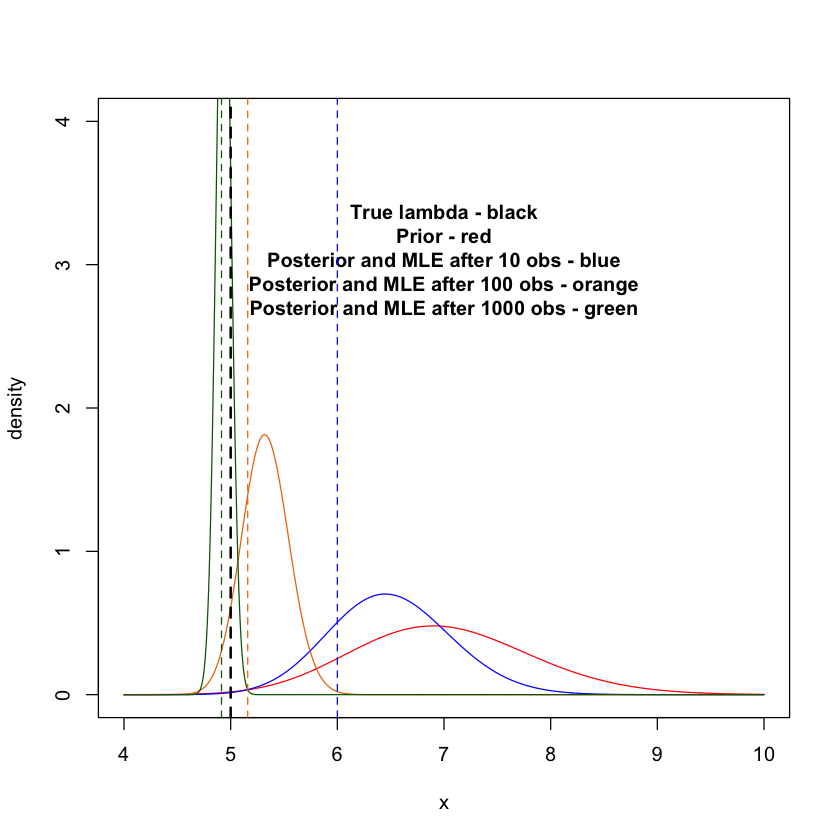

In [9]:
x <- seq(4, 10, length=1000)

plot(x, dgamma(x, a_prior, b_prior), ylim=c(0,4), ylab="density",
     lwd=1, col='red', type="l")
title("  
True lambda - black
Prior - red
Posterior and MLE after 10 obs - blue
Posterior and MLE after 100 obs - orange
Posterior and MLE after 1000 obs - green
", line = -10, cex.main = 1,
)
lines(x, dgamma(x, a_post_1, b_post_1), lwd=1, col='blue')
lines(x, dgamma(x, a_post_2, b_post_2), lwd=1, col='darkorange2')
lines(x, dgamma(x, a_post_3, b_post_3), lwd=1, col='darkgreen')
abline(v=lambda, lty=2, lwd=2, col=c("black"))


abline(v=mle_1, lty=2, lwd=1, col=c("blue")) 
abline(v=mle_2, lty=2, lwd=1, col=c("darkorange2")) 
abline(v=mle_3, lty=2, lwd=1, col=c("darkgreen"))
